<a href="https://colab.research.google.com/github/kanopf/LSTM-FOR-WEATHER-FORECASTING/blob/main/LSTMFORECASTING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" import height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>What is Colaboratory?</h1>

Colaboratory, or "Colab" for short, allows you to write and execute Python in your browser, with 
- Zero configuration required
- Free access to GPUs
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!

# **LSTM PARA PREVISÃO DE TEMPERATURA**
Neste código utilizamos dados do ano de 2013 para previsão de temperatura dos dois ultimos dias do ano, dia 30 e 31 / 12 / 2013.
Esta RN é composta por uma camada LSTM e uma camada Densa posterior. 

Saving 201301.dat to 201301 (3).dat
Saving 201302.dat to 201302 (3).dat
Saving 201303.dat to 201303 (3).dat
Saving 201304.dat to 201304 (3).dat
Saving 201305.dat to 201305 (3).dat
Saving 201306.dat to 201306 (3).dat
Saving 201307.dat to 201307 (3).dat
Saving 201308.dat to 201308 (3).dat
Saving 201309.dat to 201309 (3).dat
Saving 201310.dat to 201310 (3).dat
Saving 201311.dat to 201311 (3).dat
Saving 201312.dat to 201312 (3).dat
           algo  hora  temp_inst
0    2013-12-01     0       23.0
1    2013-12-01     1       21.9
2    2013-12-01     2       21.0
3    2013-12-01     3       20.3
4    2013-12-01     4       19.6
..          ...   ...        ...
739  2013-12-31    19       30.2
740  2013-12-31    20       29.7
741  2013-12-31    21       29.2
742  2013-12-31    22       28.7
743  2013-12-31    23       27.7

[744 rows x 3 columns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

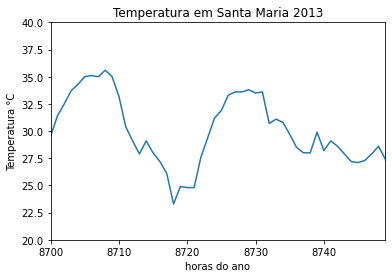

[[30. ]
 [30. ]
 [19.8]
 ...
 [29.2]
 [28.7]
 [27.7]]
Epoch 1/100
361/361 [==============================] - 1s 1ms/step - loss: 0.0300
Epoch 2/100
361/361 [==============================] - 1s 1ms/step - loss: 0.0050
Epoch 3/100
361/361 [==============================] - 1s 1ms/step - loss: 0.0034
Epoch 4/100
361/361 [==============================] - 1s 1ms/step - loss: 0.0029
Epoch 5/100
361/361 [==============================] - 1s 1ms/step - loss: 0.0024
Epoch 6/100
361/361 [==============================] - 1s 1ms/step - loss: 0.0020
Epoch 7/100
361/361 [==============================] - 1s 1ms/step - loss: 0.0017
Epoch 8/100
361/361 [==============================] - 1s 1ms/step - loss: 0.0014
Epoch 9/100
361/361 [==============================] - 1s 1ms/step - loss: 0.0012
Epoch 10/100
361/361 [==============================] - 1s 1ms/step - loss: 0.0011
Epoch 11/100
361/361 [==============================] - 1s 1ms/step - loss: 0.0010
Epoch 12/100
361/361 [====================

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

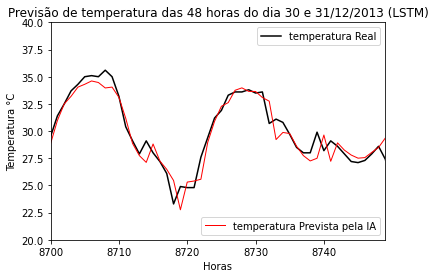

In [4]:
# LSTM Para previsão de temperatura
# Código criado para rodar em google Colab

import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from google.colab import files
import pandas as pd
import io

uploaded1   = files.upload() # Comando que cria uma variavel na memória do Colab para upload de arquivos 

# Abrindo os arquivos "upload1" que estão separados como DataFrames em Pandas, e as colunas que nos interessa fazer a previsão. Algo = data.
janeiro   = pd.read_csv(io.StringIO(uploaded1['201301.dat'].decode("utf-8")),delimiter=',',usecols=['algo','hora','temp_inst'],  engine='python')
fevereiro = pd.read_csv(io.StringIO(uploaded1['201302.dat'].decode("utf-8")),delimiter=',',usecols=['algo','hora','temp_inst'],  engine='python')
março     = pd.read_csv(io.StringIO(uploaded1['201303.dat'].decode("utf-8")),delimiter=',',usecols=['algo','hora','temp_inst'],  engine='python')
abril     = pd.read_csv(io.StringIO(uploaded1['201304.dat'].decode("utf-8")),delimiter=',',usecols=['algo','hora','temp_inst'],  engine='python')
maio      = pd.read_csv(io.StringIO(uploaded1['201305.dat'].decode("utf-8")),delimiter=',',usecols=['algo','hora','temp_inst'],  engine='python')
junho     = pd.read_csv(io.StringIO(uploaded1['201306.dat'].decode("utf-8")),delimiter=',',usecols=['algo','hora','temp_inst'],  engine='python')
julho     = pd.read_csv(io.StringIO(uploaded1['201307.dat'].decode("utf-8")),delimiter=',',usecols=['algo','hora','temp_inst'],  engine='python')
agosto    = pd.read_csv(io.StringIO(uploaded1['201308.dat'].decode("utf-8")),delimiter=',',usecols=['algo','hora','temp_inst'],  engine='python')
setembro  = pd.read_csv(io.StringIO(uploaded1['201309.dat'].decode("utf-8")),delimiter=',',usecols=['algo','hora','temp_inst'],  engine='python')
outubro   = pd.read_csv(io.StringIO(uploaded1['201310.dat'].decode("utf-8")),delimiter=',',usecols=['algo','hora','temp_inst'],  engine='python')
novembro  = pd.read_csv(io.StringIO(uploaded1['201311.dat'].decode("utf-8")),delimiter=',',usecols=['algo','hora','temp_inst'],  engine='python')
dezembro  = pd.read_csv(io.StringIO(uploaded1['201312.dat'].decode("utf-8")),delimiter=',',usecols=['algo','hora','temp_inst'],  engine='python')


#Utilizando pandas reset index podemos reindexar as colunas utilizando (drop) para resetar a indexação tornando como padrão
# a ordem de entrada dos arquivos, e utilizando inplace= True para tornar padrão essa indexação.
janeiro.reset_index(drop=True, inplace=True)
fevereiro.reset_index(drop=True, inplace=True)
março.reset_index(drop=True, inplace=True)
abril.reset_index(drop=True, inplace=True)
maio.reset_index(drop=True, inplace=True)
junho.reset_index(drop=True, inplace=True)
julho.reset_index(drop=True, inplace=True)
agosto.reset_index(drop=True, inplace=True)
setembro.reset_index(drop=True, inplace=True)
outubro.reset_index(drop=True, inplace=True)
novembro.reset_index(drop=True, inplace=True)
dezembro.reset_index(drop=True, inplace=True)
print(dezembro)

#Juntando todos os dados do ano em um único dataset
dataset = pd.concat([janeiro, fevereiro,março,abril,maio,junho,julho,agosto,setembro,outubro,novembro,dezembro],names=['algo', 'hora','temp_inst'],axis=0, ignore_index=False, sort=False)

#extraindo os valores da variavel temperatura instantanea.
dataset= dataset[['temp_inst']].values


#Plotando as ultimas 48 horas do ano
#Salvando a figura e fazendo o download com files.download ()
###################################

plt.xlim(8700, 8749)
plt.ylim(20,40)
plt.title('Temperatura em Santa Maria 2013')
plt.ylabel('Temperatura °C')
plt.xlabel('horas do ano')


plt.plot(dataset)

plt.savefig('test.png',dpi=1000)
files.download('test.png')

plt.show()
#################################




print(dataset)





# Neste ponto cria-se uma coluna defasada nas matrizes
#dataX >> Variavel defasada para entrada dos dados na rede Neural
#dataY >> Variavel de saída que esperamos obter
#look_back >> parâmetro de defasagem no tempo 
def create_dataset(dataset, look_back):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)


# evitar repetiçoes 
np.random.seed(7)


# carregando dataset e transformando em float
dataframe = dataset
dataset = dataset.astype('float32')


# normalizaçao do dataset para evitar problemas com as ativações
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


# crianto variaveis de treino, neste caso com 99% dos dados para treino
train_size = int(len(dataset) * 0.99)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


# criando dois conjuntos de dados, X=t e Y=t+1, onde look_back é a quantidade
# de variaveis de entrada da rede
look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


# como LSTM depende de um formato [input, time steps, formato]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


# criando lstm
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=24, verbose=1)


# fazendo as predições
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


# previsões inversas
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


# raiz quadrada do erro quadratico medio
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


# Separando previsão da RN para conjunto de treino
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict


# Separando previsão da RN para conjunto de teste
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(dataset), :] = testPredict


# plotando Dados + teste

plt.xlim(8700,8749)

plt.ylim(20,40)
plt.title('Previsão de temperatura das 48 horas do dia 30 e 31/12/2013 (LSTM)')
plt.ylabel('Temperatura °C')
plt.xlabel('Horas')
line1, = plt.plot(scaler.inverse_transform(dataset),color = 'black', label="temperatura Real", linestyle='-')
line2, = plt.plot(testPredictPlot,color = 'red', label="temperatura Prevista pela IA", linewidth=1)

# Create a legend for the first line.
first_legend = plt.legend(handles=[line1], loc=1)

# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(first_legend)

# Create another legend for the second line.
plt.legend(handles=[line2], loc=4)


plt.savefig('test2.png',dpi=1000)
files.download('test2.png')

plt.show()

## **Getting started**

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

## Data science

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

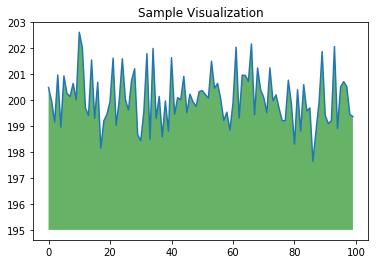

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

## Machine learning

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb). Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

## More Resources

### Working with Notebooks in Colab
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [TensorFlow 2 in Colab](/notebooks/tensorflow_version.ipynb)

<a name="working-with-data"></a>
### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb)
- [Tensorflow concepts](/notebooks/mlcc/tensorflow_programming_concepts.ipynb)
- [First steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [Intro to neural nets](/notebooks/mlcc/intro_to_neural_nets.ipynb)
- [Intro to sparse data and embeddings](/notebooks/mlcc/intro_to_sparse_data_and_embeddings.ipynb)

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<a name="machine-learning-examples"></a>

## Machine Learning Examples

To see end-to-end examples of the interactive machine learning analyses that Colaboratory makes possible, check out these  tutorials using models from [TensorFlow Hub](https://tfhub.dev).

A few featured examples:

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io

np.random.seed(7)
uploaded = files.upload()
df = pd.read_csv(io.StringIO(uploaded["aereo.txt"].decode("utf-8")),usecols=[1], engine= 'python')
plt.plot(df)
plt.show
print(df)

ds =df.values
ds =ds.astype('float32')
scaler = MinMaxScaler(feature_range=(0,1))
ds = scaler.fit_transform(ds)

#separando os dados de treino e teste

# % de dados de treino
per_train = 0.67

train_size = int(len(ds)*per_train)
test_size = len(ds) - train_size
train, test = ds[0:train_size,:], ds[train_size:len(ds),1:]
print(len(train),len(test))

#criando uma variavel X para o numero de passageiros em (t)
#E uma variavel Y para para os passageiros em (t+1)
#o parametro look back é o numero de entradas da rede neural para previsão
def create_dataset(dataset, look_back=1):
  dataX,dataY=[], []
  for i in range(len(ds)-look_back-1):
    a= ds[i:(i+look_back),0]
    dataX.append(a)
    dataY.append(ds[i + look_back,0])
  return np.array(dataX),np.array(dataY)

look_back = 1

trainX, trainY= create_dataset(train, look_back)
testX, testY= create_dataset(test, look_back)

#como as redes LSTM pedem as entradas como [entradas,time_step,formato]

trainX = np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX = np.reshape(testX,(testX.shape[0],1,testX.shape[1]))


#formato da rede
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size =1, verbose=2)

#previsões
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
#previsão inversa
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
#calculando a erro quadratico médio

trainScore = math.sqrt(mean_squared_error(trainY[0],trainPredict[:,0]))
print('Escore do conjunto de treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Escore do conjunto de teste: %2f RMSE' % (testScore))


#separando as previsões do treino para plotar

trainPredictPlot = np.empty_like(ds)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

#separando as previsões fo conjunto de test

testPredictPlot = np.empty_like(ds)
testPredictPlot[:, :] = np.nan 
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(ds)-1, :] = testPredict

#plotando, em Azul os dados originais, previsão com dados de treino em Verde
#previsão com os dados de teste em vermelho

plt.plot(scaler.inverse_transform(ds))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()



FileNotFoundError: ignored